In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import os

%matplotlib inline


In [6]:
def get_plot_data(path, span=1000):
    df = pd.DataFrame()

    with open(path + 'test.txt') as file:
        data = pd.read_csv(file, index_col=None)
        df = df.append(data, ignore_index=True)

    df['r'] = df['r'].ewm(span=span).mean()
    return df


In [9]:
i = 0

TIMESTEP = 50e6
NSAMPLE = 1e4
GAMES = ['Breakout', 'Seaquest', 'Pong', 'MontezumaRevenge']
YMAXS = [500, 2000, 22, 1]
METHODS = ['a3c']

res_dir = './res/'
files = os.listdir(res_dir)
sample_list = np.arange(0, TIMESTEP, TIMESTEP/NSAMPLE, dtype=np.int)

df = pd.DataFrame()
for file in os.listdir(res_dir):
    m = re.match('(.*)_(.*)_(.*)', file)
    env = m.group(1)
    method = m.group(2)
    seed = m.group(3)
    if (GAMES[i] in env) and (method in METHODS):
        path = res_dir + file + '/'
        data = get_plot_data(path)

        sample = pd.DataFrame()
        sample['t'] = sample_list
        sample['r'] = np.nan

        # interpolation
        res = pd.concat([sample, data], join='inner')
        res.sort_values('t', inplace=True)
        res.interpolate(method='linear', inplace=True)
        res = res[res['t'].isin(sample_list)]

        res['seed'] = int(seed)
        res[''] = method
        df = df.append(res, ignore_index=True)

print(df)


              t           r  seed     
0             0         NaN     0  a3c
1          5000    9.500500     0  a3c
2         10000    5.618101     0  a3c
3         15000    3.765440     0  a3c
4         20000    3.466282     0  a3c
5         25000    3.302923     0  a3c
6         30000    3.068502     0  a3c
7         35000    3.057424     0  a3c
8         40000    2.673577     0  a3c
9         45000    2.400459     0  a3c
10        50000    2.518151     0  a3c
11        55000    2.454934     0  a3c
12        60000    2.411355     0  a3c
13        65000    2.374999     0  a3c
14        70000    2.344210     0  a3c
15        75000    2.317803     0  a3c
16        80000    2.332990     0  a3c
17        85000    2.297151     0  a3c
18        90000    2.367906     0  a3c
19        95000    2.312939     0  a3c
20       100000    2.302529     0  a3c
21       105000    2.369776     0  a3c
22       110000    2.256505     0  a3c
23       115000    2.245613     0  a3c
24       120000    2.3046

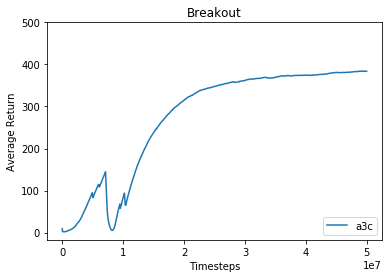

In [10]:
ax = sns.lineplot(x='t', y='r', hue='', ci=95, n_boot=10, 
                  hue_order=['a3c'], 
                  data=df)
ax.set(title=GAMES[i], xlabel='Timesteps', ylabel='Average Return')
plt.ylim(ymax=YMAXS[i])
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3))
plt.legend(loc='lower right')
# plt.savefig('/home/liuyuezhangadam/Desktop/'+GAMES[i]+'.png', dpi=300)
